# Census Income Project

#### Problem Statement

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1. A single cell estimate of the population 16+ for each state.

2. Controls for Hispanic Origin by age and sex.

3. Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import statsmodels.api as sma
from scipy.stats import zscore
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

#### Importing dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Univariate analysis

In [4]:
df.shape

(32560, 15)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

9 columns are object type and 6 columns are numerical type

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

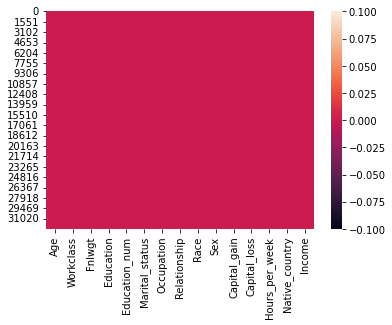

In [8]:
sns.heatmap(df.isnull())

There are no null values in the data set.

In [11]:
df[10:30]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
10,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
11,23,Private,122272,Bachelors,13,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50K
12,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0,0,50,United-States,<=50K
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
14,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
15,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
16,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
17,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
18,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K
19,40,Private,193524,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,>50K


In [17]:
df[26:]

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
27,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
28,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
29,23,Local-gov,190709,Assoc-acdm,12,Never-married,Protective-serv,Not-in-family,White,Male,0,0,52,United-States,<=50K
30,20,Private,266015,Some-college,10,Never-married,Sales,Own-child,Black,Male,0,0,44,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


However, we can see from data contains ? values in certain points. So we will change those to NaN values.

In [28]:
df.Occupation[26]

' ?'

In [3]:
df[df == ' ?'] = np.nan

In [4]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

<AxesSubplot:>

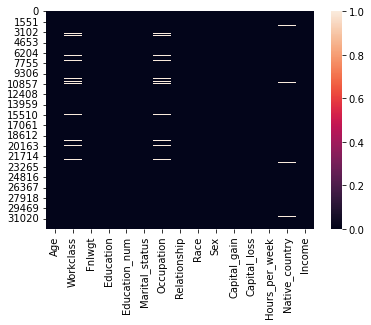

In [31]:
sns.heatmap(df.isnull())

Now we can see that we have 1836+ missing values in workclass and occupation and 583 missing values in native country.

In [9]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


We can see that there is high standard deviation in every column, especially fnlwgt and capital gain. This is due to the high range in columns and also due to outliers, especially in capital loss and capital gain.

In [32]:
df.nunique()

Age                  73
Workclass             8
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           14
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       41
Income                2
dtype: int64

In [33]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

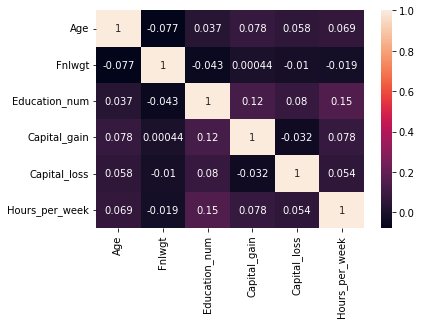

In [34]:
sns.heatmap(df.corr(), annot=True)

We can see that fnlwgt column has the lowest amount of correlation with all columns.

In [35]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

We can observe skewness in fnlwgt, capital gain and capital loss columns.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education_num'}>],
       [<AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>,
        <AxesSubplot:title={'center':'Hours_per_week'}>]], dtype=object)

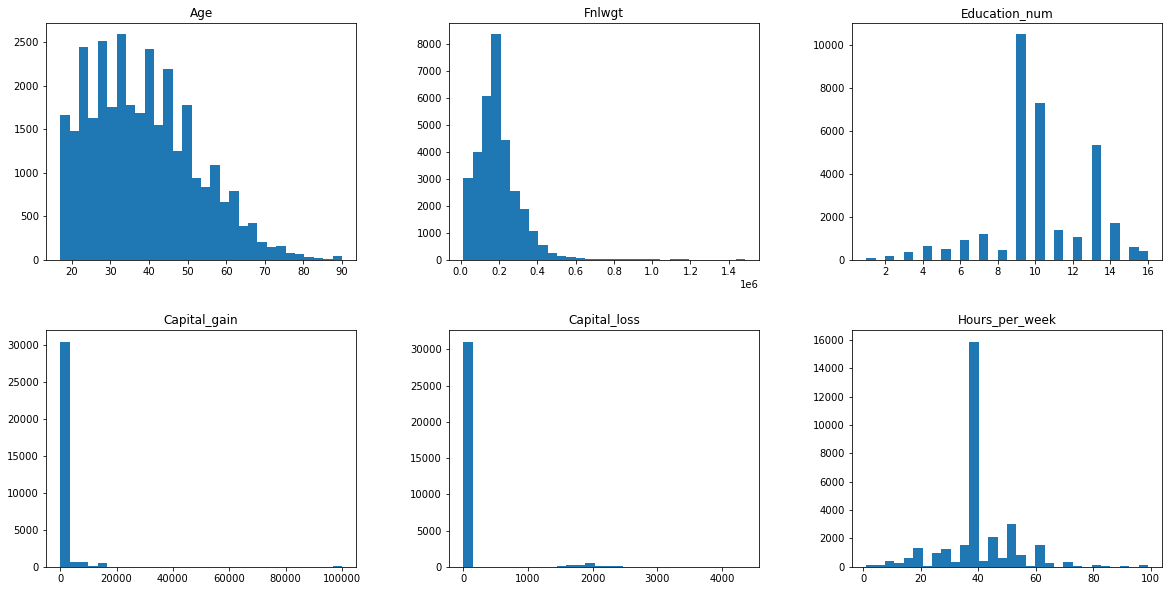

In [36]:
df.hist(figsize=(20,10), grid=False, layout=(2, 3), bins = 30)

We can clearly visualize the skewness in fnlwgt, capital gain and capital loss, which are all right skewed.

<AxesSubplot:>

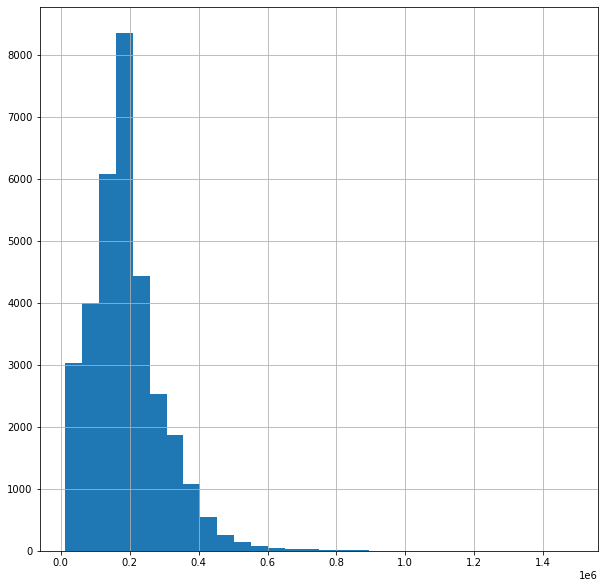

In [37]:
df['Fnlwgt'].hist(figsize=(10,10), bins=30)

Most values are in the 200000 range, causing the data to be skewed.

<AxesSubplot:>

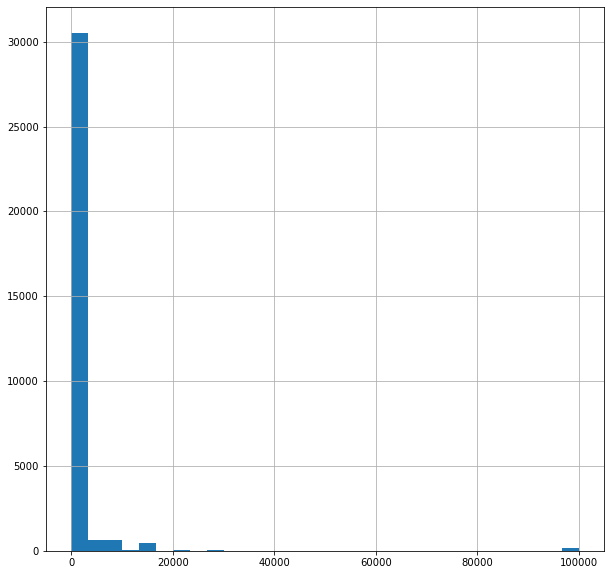

In [38]:
df['Capital_gain'].hist(figsize=(10,10), bins=30)

We can observe that most 30000+ people had no capital gain, while very very few had a massive amount of capital gain.

<AxesSubplot:>

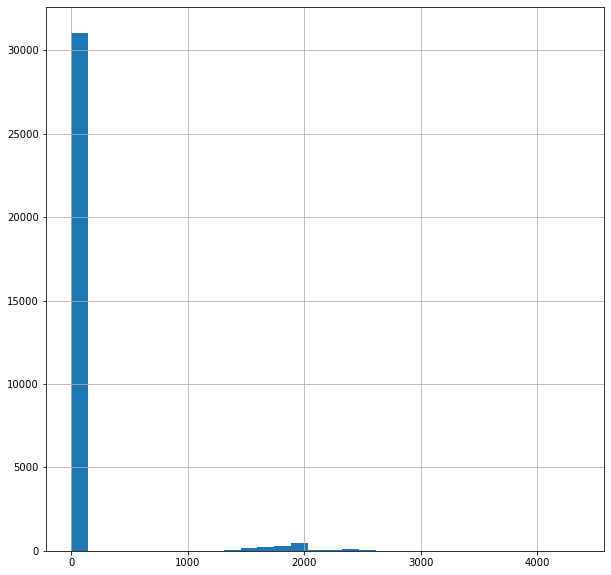

In [39]:
df['Capital_loss'].hist(figsize=(10,10), bins=30)

Like above, we can again observe that most 30000+ people had no capital loss, while very very few had some capital loss. However we can clearly compare and see that the overall amount of capital gain was much higher than the capital loss.

Text(0.5, 1.0, 'Outliers in the columns')

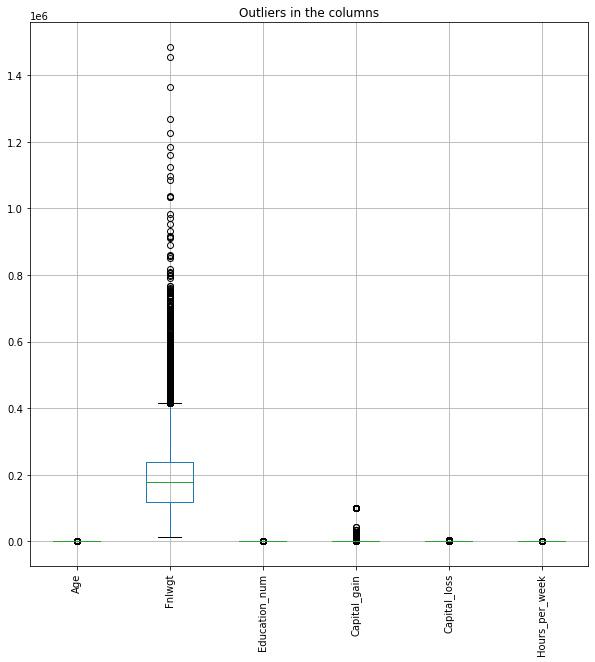

In [40]:
df.boxplot(figsize=(10,10))
plt.xticks(rotation= 90)
plt.title('Outliers in the columns')

There is a very high amount of outliers present in Fnlwgt, as well as some in capital gain and capital loss.

<AxesSubplot:xlabel='Fnlwgt'>

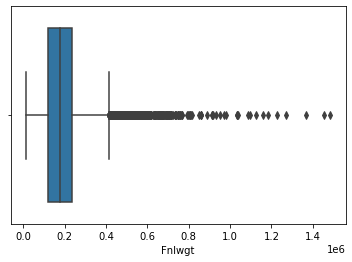

In [41]:
sns.boxplot(df['Fnlwgt'])

There are several outliers from the 40000 point.

<AxesSubplot:xlabel='Capital_gain'>

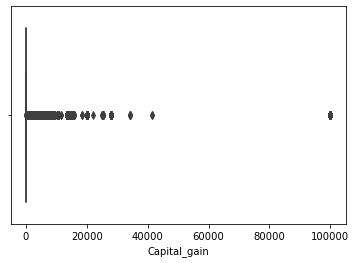

In [42]:
sns.boxplot(df['Capital_gain'])

As we saw in this histogram above, the majority of people had no capital gain, and hence the people who did have capital gain are treated as outliers. We can also observe that only 1 individual from the dataset had the capital gain of 100000 dollars.

<AxesSubplot:xlabel='Capital_loss'>

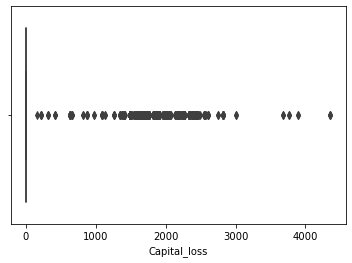

In [43]:
sns.boxplot(df['Capital_loss'])

The maximum capital loss was around 4500 dollars. However majority of people had no capital loss and that is why these values are all treated as outliers.

<AxesSubplot:xlabel='Age'>

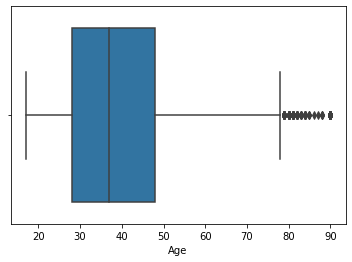

In [44]:
sns.boxplot(df['Age'])

We can see that most people are 17+ but there are some people who are 78+ and they are treated as outliers.

<AxesSubplot:xlabel='Education_num'>

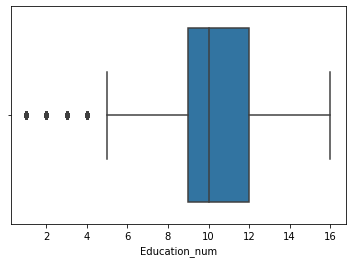

In [45]:
sns.boxplot(df['Education_num'])

We can see that there are only 4 people with education_num less than 5.

<AxesSubplot:xlabel='Income', ylabel='count'>

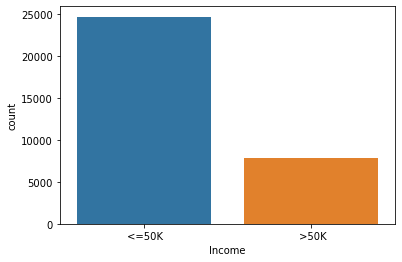

In [5]:
sns.countplot(df['Income'])

We can see that most individuals have income less than 50k, and few have income greater than 50K.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

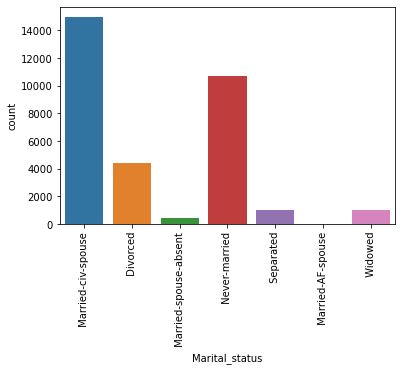

In [7]:
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)

Maximum people are married or in a civil partnership. Second majority is of people who have never been married. The least amount of people are married-af-spouse meaning their spouse is in the armed forces.

In [10]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

In [11]:
df['Occupation'].nunique()

14

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

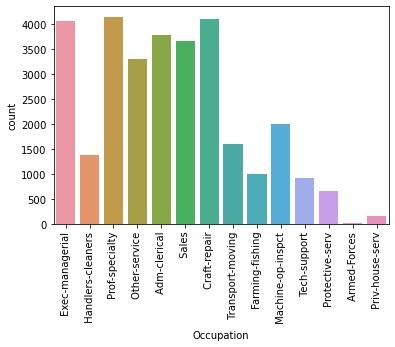

In [12]:
sns.countplot(df['Occupation'])
plt.xticks(rotation=90)

Most people are in the occupation prof-specialty andf craft-repair. The least amount of people are in armed forces.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

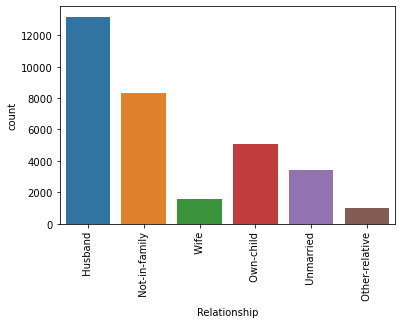

In [13]:
sns.countplot(df['Relationship'])
plt.xticks(rotation=90)

Most people are husbands, and second majority is of people who are not in family. The least amount of people are classified as other relative.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

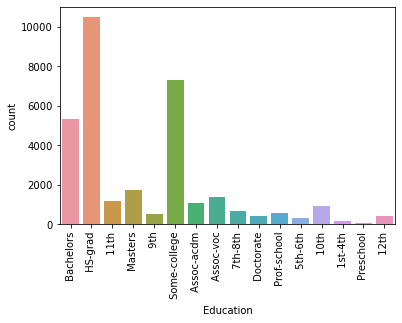

In [14]:
sns.countplot(df['Education'])
plt.xticks(rotation=90)

Highest number of people are high school graduates. The least number of people only went to preschool.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

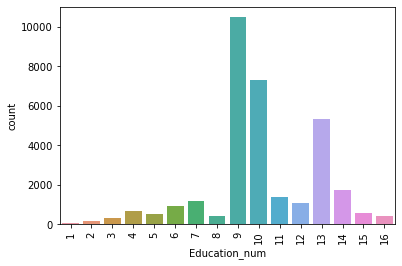

In [15]:
sns.countplot(df['Education_num'])
plt.xticks(rotation=90)

This is just the education column encoded, where 9 represents high school graduates, 10 represents some college, 13 represents bachelors and so on.

In [4]:
def age_group(x):
    x = int(x)
    x = abs(x)
    if 16 < x < 20:
        return "Teens"
    elif 20 <= x < 30:
        return "20s"
    elif 30 <= x < 40:
        return "30s"
    elif 40 <= x < 50:
        return "40s"
    elif 50 <= x < 60:
        return "50s"
    elif 60 <= x < 70:
        return "60s"
    elif 70 <= x < 80:
        return "70s"
    else:
        return "80+"

df['age_group'] = df['Age'].apply(age_group)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '50s'),
  Text(1, 0, '30s'),
  Text(2, 0, '20s'),
  Text(3, 0, '40s'),
  Text(4, 0, 'Teens'),
  Text(5, 0, '70s'),
  Text(6, 0, '60s'),
  Text(7, 0, '80+')])

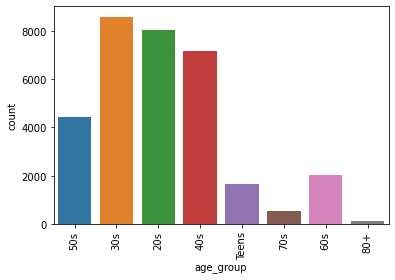

In [21]:
sns.countplot(df['age_group'])
plt.xticks(rotation=90)

We can see that the maximum amount of people are in their 30s, 20s and 40s. The least amount of people are in their 80s.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

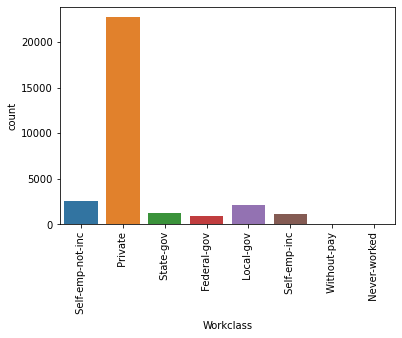

In [23]:
sns.countplot(df['Workclass'])
plt.xticks(rotation=90)

Most people are employed in the private sector and all the other categories are much less. The least amount of people either work without pay or have never worked.

In [24]:
df.Workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

So we can see that only 7 people have never worked and 14 people work without pay.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

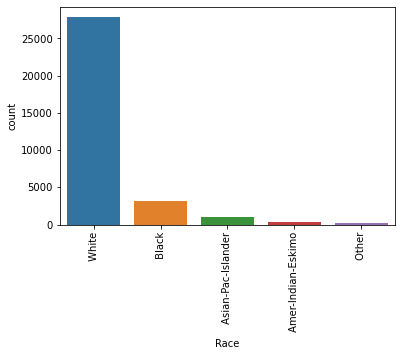

In [25]:
sns.countplot(df['Race'])
plt.xticks(rotation=90)

Majority of people are White, and least are American-Indian-eskimo or other.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

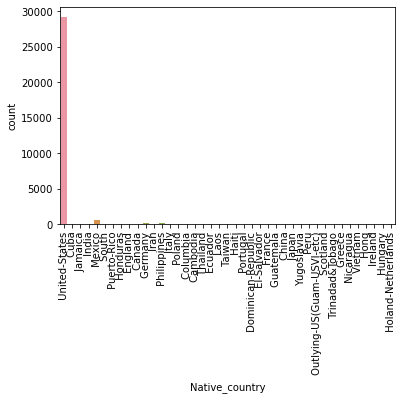

In [26]:
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)

Majority of people are from the US itself, and the second majority is of people from Mexico, although there is very high population difference between US and Mexico. Very few people are from all the other countries.

In [27]:
df.Native_country.value_counts()

 United-States                 29169
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

So we can see that exactly 29169 people are from the US, and 643 from Mexico. One person is from the Netherlands and 100 people are from India.

<AxesSubplot:xlabel='Sex', ylabel='count'>

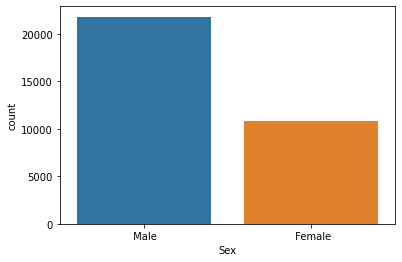

In [28]:
sns.countplot(df['Sex'])

Majority of the people in this data are male.

In [29]:
df.Sex.value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

67% of the people are male and 33% are female.

<AxesSubplot:>

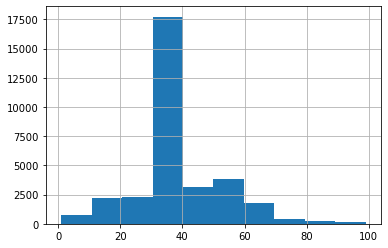

In [33]:
df.Hours_per_week.hist()

# Bivariate Analysis

In [ ]:
sns.pairplot(df)

<AxesSubplot:xlabel='Sex', ylabel='count'>

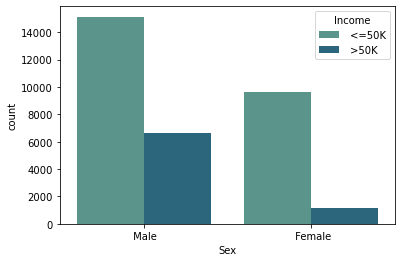

In [14]:
sns.countplot(x=df['Sex'], hue=df['Income'], palette='crest')

We can observe that around 30% of the total males earn more than 50k while less than 10% of total females earn more than 50k

<AxesSubplot:xlabel='age_group', ylabel='count'>

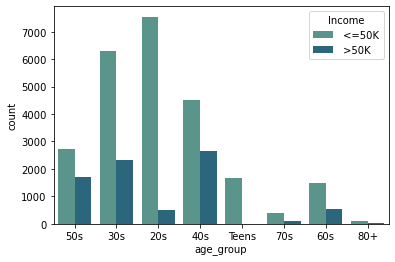

In [11]:
sns.countplot(x=df['age_group'], hue=df['Income'], palette='crest')

We can observe that no people in their teens earn over 50k. Only 500 people in their 20s earn over 50k. around 40% in their 50s earn over 50k.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

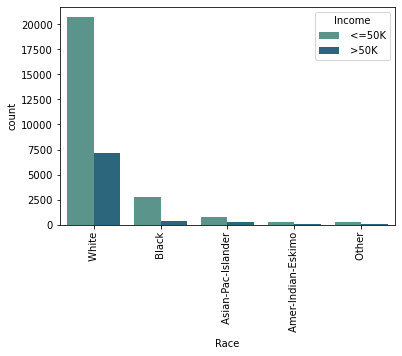

In [13]:
sns.countplot(x=df['Race'], hue=df['Income'], palette='crest')
plt.xticks(rotation=90)

Majority of people earning 50k+ are white. However, in the 'other' races column, ratio of people earning over 50K is higher.

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' Self-emp-not-inc'),
  Text(1, 0, ' Private'),
  Text(2, 0, ' State-gov'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

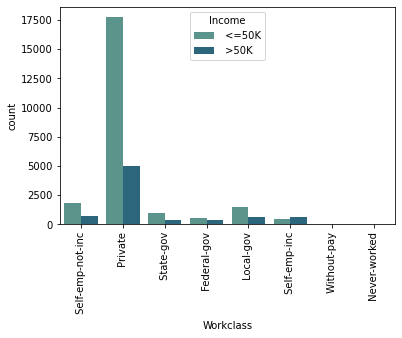

In [16]:
sns.countplot(x=df['Workclass'], hue=df['Income'], palette='crest')
plt.xticks(rotation=90)

Only in the self employed column there is a majority of people who earn over 50k. There is high discrepancies in all other column. Around 45% in the federal govt also earn over 50k.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, ' Bachelors'),
  Text(1, 0, ' HS-grad'),
  Text(2, 0, ' 11th'),
  Text(3, 0, ' Masters'),
  Text(4, 0, ' 9th'),
  Text(5, 0, ' Some-college'),
  Text(6, 0, ' Assoc-acdm'),
  Text(7, 0, ' Assoc-voc'),
  Text(8, 0, ' 7th-8th'),
  Text(9, 0, ' Doctorate'),
  Text(10, 0, ' Prof-school'),
  Text(11, 0, ' 5th-6th'),
  Text(12, 0, ' 10th'),
  Text(13, 0, ' 1st-4th'),
  Text(14, 0, ' Preschool'),
  Text(15, 0, ' 12th')])

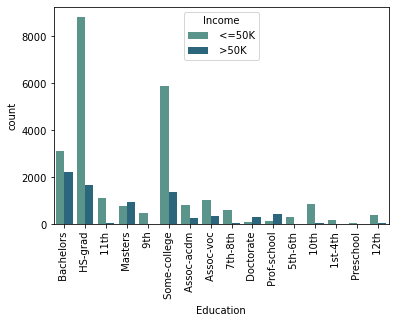

In [17]:
sns.countplot(x=df['Education'], hue=df['Income'], palette='crest')
plt.xticks(rotation=90)

Majority of people with Masters, Doctorate, Prof-school education earn over 50K. Around 45% people with Bachelors degree also earn more than 50k. This shows that the higher the education level, the more likely they are to earn higher salary.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Divorced'),
  Text(2, 0, ' Married-spouse-absent'),
  Text(3, 0, ' Never-married'),
  Text(4, 0, ' Separated'),
  Text(5, 0, ' Married-AF-spouse'),
  Text(6, 0, ' Widowed')])

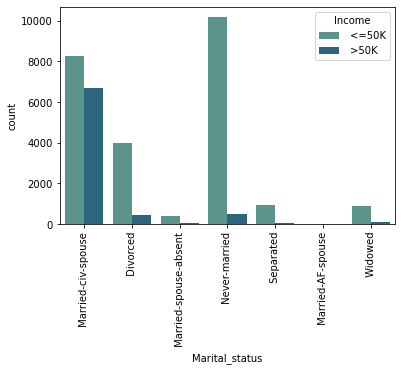

In [18]:
sns.countplot(x=df['Marital_status'], hue=df['Income'], palette='crest')
plt.xticks(rotation=90)

around 45% who in the category married-civ-spouse earn over 50k. In all other columns, the amount of people who earn over 50K is much lower.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Exec-managerial'),
  Text(1, 0, ' Handlers-cleaners'),
  Text(2, 0, ' Prof-specialty'),
  Text(3, 0, ' Other-service'),
  Text(4, 0, ' Adm-clerical'),
  Text(5, 0, ' Sales'),
  Text(6, 0, ' Craft-repair'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Farming-fishing'),
  Text(9, 0, ' Machine-op-inspct'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Armed-Forces'),
  Text(13, 0, ' Priv-house-serv')])

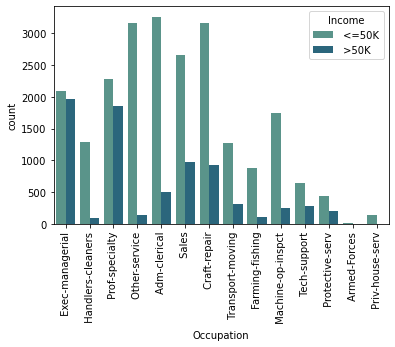

In [19]:
sns.countplot(x=df['Occupation'], hue=df['Income'], palette='crest')
plt.xticks(rotation=90)

48% people in executive managerial roles earn more than 50k. Around 45% people in prof-specialty roles also earn over 50k. In all other careers, there are lower levels of people who earn over 50k.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

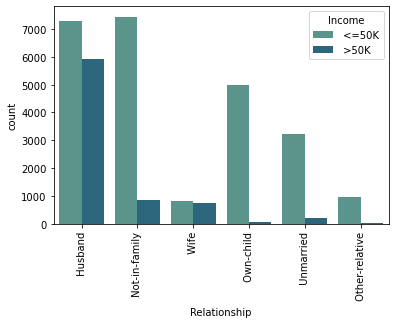

In [20]:
sns.countplot(x=df['Relationship'], hue=df['Income'], palette='crest')
plt.xticks(rotation=90)

around 40% men who are hsubands earn over 50K and around 48% women who are wives earn over 50k. 

# Feature engineering

# Imputing null values

In [21]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
age_group            0
dtype: int64

In [5]:
imp = SimpleImputer(strategy='most_frequent')

Replacing null values with the most frequently occurring values

In [6]:
df['Workclass'] = imp.fit_transform(df['Workclass'].values.reshape(-1,1))
df['Occupation'] = imp.fit_transform(df['Occupation'].values.reshape(-1,1))
df['Native_country'] = imp.fit_transform(df['Native_country'].values.reshape(-1,1))

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
age_group         0
dtype: int64

<AxesSubplot:>

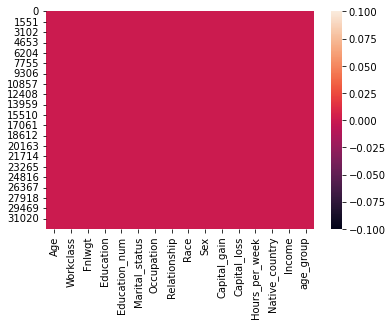

In [28]:
sns.heatmap(df.isnull())

There are no more null values.

# Skewness

In [8]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

There is high skewness in fnlwgt, capital gain and capital loss. We will remove it.

In [9]:
df['Fnlwgt'] = np.sqrt(df['Fnlwgt'])
df['Capital_gain'] = np.sqrt(df['Capital_gain'])
df['Capital_loss'] = np.sqrt(df['Capital_loss'])

In [10]:
df.skew()

Age               0.558738
Fnlwgt            0.189066
Education_num    -0.311630
Capital_gain      5.894949
Capital_loss      4.376279
Hours_per_week    0.227636
dtype: float64

In [11]:
df['Capital_gain'] = np.sqrt(df['Capital_gain'])
df['Capital_loss'] = np.sqrt(df['Capital_loss'])

In [12]:
df.skew()

Age               0.558738
Fnlwgt            0.189066
Education_num    -0.311630
Capital_gain      3.556495
Capital_loss      4.322084
Hours_per_week    0.227636
dtype: float64

We can see that due to the presence of high values which are being outliers, we cannot remove skewness any further.

# Dropping unnecessary columns

We know now that education_num is an numerical encoded column for education column, where the higher the number, the higher the education level. So, we can drop Education column. We can also drop Relationship column as we already have Marital_status.
We will also drop the age_group column we created for better visualisation.

In [14]:
df.drop(['Education', 'Relationship', 'age_group'], axis=1, inplace=True)

In [15]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,288.636450,13,Married-civ-spouse,Exec-managerial,White,Male,0.0,0.0,13,United-States,<=50K
1,38,Private,464.377002,9,Divorced,Handlers-cleaners,White,Male,0.0,0.0,40,United-States,<=50K
2,53,Private,484.480134,7,Married-civ-spouse,Handlers-cleaners,Black,Male,0.0,0.0,40,United-States,<=50K
3,28,Private,581.729318,13,Married-civ-spouse,Prof-specialty,Black,Female,0.0,0.0,40,Cuba,<=50K
4,37,Private,533.462276,14,Married-civ-spouse,Exec-managerial,White,Female,0.0,0.0,40,United-States,<=50K


# Encoding object type columns

In [16]:
df.dtypes

Age                 int64
Workclass          object
Fnlwgt            float64
Education_num       int64
Marital_status     object
Occupation         object
Race               object
Sex                object
Capital_gain      float64
Capital_loss      float64
Hours_per_week      int64
Native_country     object
Income             object
dtype: object

In [17]:
le = LabelEncoder()
list1 = ['Workclass', 'Marital_status', 'Occupation', 'Race', 'Sex', 'Native_country', 'Income']
for i in list1:
    df[i] = le.fit_transform(df[i].astype(str))

In [18]:
df.head()

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,288.636450,13,2,3,4,1,0.0,0.0,13,38,0
1,38,3,464.377002,9,0,5,4,1,0.0,0.0,40,38,0
2,53,3,484.480134,7,2,5,2,1,0.0,0.0,40,38,0
3,28,3,581.729318,13,2,9,2,0,0.0,0.0,40,4,0
4,37,3,533.462276,14,2,3,4,0,0.0,0.0,40,38,0


All columns are now float or integer type.

# SMOTE

<AxesSubplot:xlabel='Income', ylabel='count'>

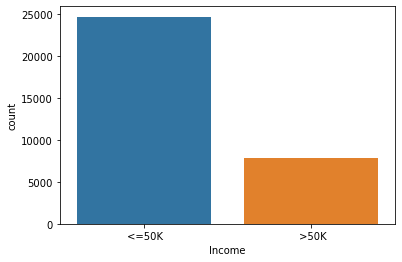

In [29]:
sns.countplot(df['Income'])

We can see that there is high discrepancy here, and there are many more people earning less than 50k. So to ensure effective learning of the machine learning models, we will use SMOTE

### Splitting data for applying smote

In [19]:
xi = df.iloc[:,0:-1]

In [20]:
yi = df.iloc[:,-1]
yi.value_counts()

0    24719
1     7841
Name: Income, dtype: int64

In [23]:
smt = SMOTE()
x,y = smt.fit_resample(xi,yi)

In [24]:
y.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

Now we have an equal amount of people with less than and more than 50k income, so the model can learn without bias.

In [25]:
df = x
df['Income'] = y

In [26]:
df

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,288.636450,13,2,3,4,1,0.000000,0.0,13,38,0
1,38,3,464.377002,9,0,5,4,1,0.000000,0.0,40,38,0
2,53,3,484.480134,7,2,5,2,1,0.000000,0.0,40,38,0
3,28,3,581.729318,13,2,9,2,0,0.000000,0.0,40,4,0
4,37,3,533.462276,14,2,3,4,0,0.000000,0.0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49433,36,3,307.000629,13,2,7,1,0,9.901309,0.0,21,38,1
49434,51,3,403.800372,9,2,10,4,1,0.000000,0.0,40,38,1
49435,51,3,403.757882,9,1,2,4,1,9.654341,0.0,50,38,1
49436,58,3,334.183836,14,2,9,4,1,0.000000,0.0,40,38,1


# Checking multicollinearity with variance inflation factor

In [27]:
def vif_calc():
    vif = pd.DataFrame()
    vif['variables'] = df[0:-1].columns
    vif['VIF FACTOR'] = [variance_inflation_factor(df[0:-1].values,i) for i in range(df[0:-1].shape[1])]
    return vif

In [29]:
vif_calc()

,variables,VIF FACTOR
0,Age,11.060278
1,Workclass,8.431865
2,Fnlwgt,11.648106
3,Education_num,20.278794
4,Marital_status,4.497548
5,Occupation,3.515668
6,Race,20.794178
7,Sex,3.666984
8,Capital_gain,1.266180
9,Capital_loss,1.103596


<AxesSubplot:>

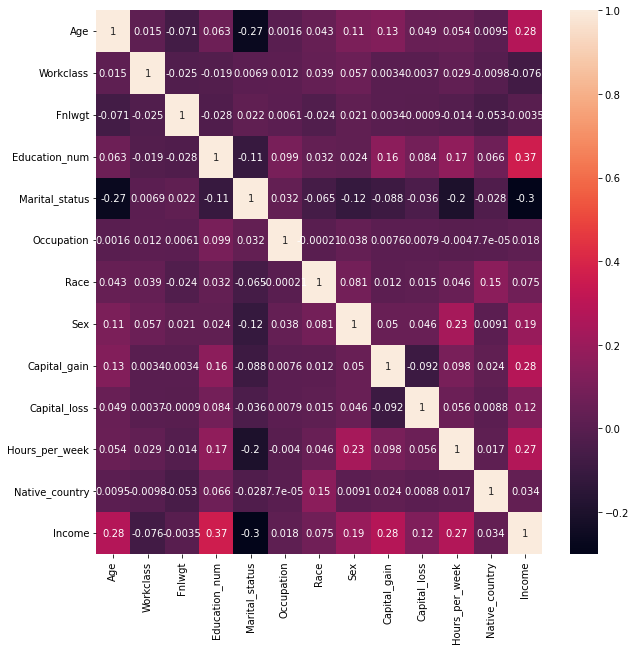

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

We can see there is very low multicollinearity in the data.

# Splitting data for training and testing

In [31]:
x = df.iloc[:,0:-1]
x

,Age,Workclass,Fnlwgt,Education_num,Marital_status,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,5,288.636450,13,2,3,4,1,0.000000,0.0,13,38
1,38,3,464.377002,9,0,5,4,1,0.000000,0.0,40,38
2,53,3,484.480134,7,2,5,2,1,0.000000,0.0,40,38
3,28,3,581.729318,13,2,9,2,0,0.000000,0.0,40,4
4,37,3,533.462276,14,2,3,4,0,0.000000,0.0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...
49433,36,3,307.000629,13,2,7,1,0,9.901309,0.0,21,38
49434,51,3,403.800372,9,2,10,4,1,0.000000,0.0,40,38
49435,51,3,403.757882,9,1,2,4,1,9.654341,0.0,50,38
49436,58,3,334.183836,14,2,9,4,1,0.000000,0.0,40,38


In [32]:
y = df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
49433    1
49434    1
49435    1
49436    1
49437    1
Name: Income, Length: 49438, dtype: int32

### Models

In [33]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
svc = SVC()
dtc = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [34]:
models = [lr, knn, svc, dtc, rf]

### Finding best random state

In [35]:
best_random_state = 0
best_score = 0
for i in range(100):
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=i)
    lr.fit(xtrain,ytrain)
    pred = lr.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'At random score {i}, accuracy score is {score}')
    if score > best_score:
        best_score = score
        best_random_state = i
print(f'Best score is {best_score} at random state {best_random_state}')

At random score 0, accuracy score is 0.7406957928802589
At random score 1, accuracy score is 0.7198624595469255
At random score 2, accuracy score is 0.7331108414239482
At random score 3, accuracy score is 0.7260315533980582
At random score 4, accuracy score is 0.7239077669902912
At random score 5, accuracy score is 0.7186488673139159
At random score 6, accuracy score is 0.7313915857605178
At random score 7, accuracy score is 0.7307847896440129
At random score 8, accuracy score is 0.7414037216828478
At random score 9, accuracy score is 0.7204692556634305
At random score 10, accuracy score is 0.7275485436893204
At random score 11, accuracy score is 0.7290655339805825
At random score 12, accuracy score is 0.7308859223300971
At random score 13, accuracy score is 0.7402912621359223
At random score 14, accuracy score is 0.7260315533980582
At random score 15, accuracy score is 0.7286610032362459
At random score 16, accuracy score is 0.7249190938511327
At random score 17, accuracy score is 0.7

### We will proceed with random state 8

In [36]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.2, random_state=8)

In [37]:
for i in models:
    i.fit(xtrain,ytrain)
    training_score = cross_val_score(i, xtrain, ytrain, cv=5)
    pred = i.predict(xtest)
    score = accuracy_score(ytest, pred)
    print(f'Model {i} had training score of {training_score.mean()*100}% and an accuracy score of {score}')

Model LogisticRegression() had training score of 72.74589127686473% and an accuracy score of 0.7414037216828478
Model KNeighborsClassifier() had training score of 78.826801517067% and an accuracy score of 0.8048139158576052
Model SVC() had training score of 72.95069532237675% and an accuracy score of 0.7372572815533981
Model DecisionTreeClassifier() had training score of 83.97724399494312% and an accuracy score of 0.8480987055016181
Model RandomForestClassifier() had training score of 88.20733249051833% and an accuracy score of 0.8883495145631068


### We will proceed with random forest classifier

In [38]:
parameters = { 
    'n_estimators': [200, 400],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5],
    'min_samples_leaf': range(1,3)
}

In [39]:
grid = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)

In [40]:
grid.fit(xtrain, ytrain)
grid.best_params_

{'criterion': 'gini',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

### There are the parameters we will put in the model for final training and testing.

In [41]:
rf = RandomForestClassifier(criterion='gini', min_samples_leaf=1, min_samples_split=2, n_estimators=400)

In [42]:
rf.fit(xtrain, ytrain)
pred = rf.predict(xtest)
print(f'The cross validated score of this model is: {(cross_val_score(rf, xtrain,ytrain,cv=5).mean())*100}')

The cross validated score of this model is: 88.25031605562579


In [43]:
print(f'The accuracy score is {accuracy_score(ytest, pred)*100}')

The accuracy score is 88.91585760517799


In [44]:
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))

[[4319  669]
 [ 427 4473]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      4988
           1       0.87      0.91      0.89      4900

    accuracy                           0.89      9888
   macro avg       0.89      0.89      0.89      9888
weighted avg       0.89      0.89      0.89      9888



# AUC-ROC

In [45]:
# predict probability of getting 1 with different threshold values
pred = rf.predict_proba(xtest)[:,1]

In [46]:
pred

array([0.77  , 0.915 , 0.0875, ..., 0.215 , 0.045 , 0.06  ])

In [49]:
fpr, tpr, thresholds = roc_curve(ytest, pred)

<function matplotlib.pyplot.show(close=None, block=None)>

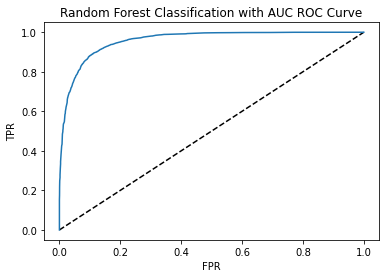

In [50]:
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Random Forest Classification with AUC ROC Curve')
plt.show

We can observe that the area under the roc curve is 95% of the total area.

In [51]:
auc_score = roc_auc_score(ytest, pred)
auc_score

0.958352883655467

## Conclusion: Random Forest Classifier is the best model with cross val score of 88.25%, and accuracy score of 88.91%, and roc-auc score of 95.83%

# Saving the best model

In [52]:
import pickle
filename = 'censusincome.pkl'
pickle.dump(rf, open(filename, 'wb'))